In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
df = pd.read_excel('Координаты движения мыши.xlsx').loc[0:10000]
df.to_excel('Координаты движения мыши  mini.xlsx')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
df = pd.read_excel('Координаты движения мыши.xlsx')#.loc[0:10000]

def remove_last_number_and_semicolon(line):
    num_digits = count_digits_before_last_semicolon(line)
    if line.endswith(","):
        line = line[:-1]  # Remove the last semicolon
    last_comma_index = line.rfind(",")  # Find the last comma index
    if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
        line = line[:last_comma_index+num_digits+1]  # Remove the last number and last semicolon

    # Remove comma if it is the last symbol in the line
    if line.endswith(","):
        line = line[:-1]

    return line

def count_digits_before_last_semicolon(line):
    last_semicolon_index = line.rfind(";")
    if last_semicolon_index == -1:
        return 0  # If there is no semicolon in the line, return 0

    before_semicolon = line[:last_semicolon_index]
    last_comma_index = before_semicolon.rfind(",")
    if last_comma_index == -1:
        return 0  # If there is no comma before the last semicolon, return 0

    number_before_semicolon = before_semicolon[last_comma_index+1:]
    num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
    return num_digits


# Set the threshold for straight line detection
straight_line_threshold = 100  # Adjust this value as needed

# Create empty lists to store the indexes
bot_indexes = []
human_indexes = []

# Iterate over each cell in the column
for index, cell_value in enumerate(df['Массив координат']):
    if pd.isnull(cell_value) or cell_value == "":
        continue  # Skip iteration if the cell value is NaN or empty
    
    cell_value = remove_last_number_and_semicolon(cell_value)
    coord_list = cell_value.split(';')
    
    # Check if any empty string is present in coord_list
    if any(not coord for coord in coord_list):
        continue  # Skip iteration if an empty string is found
    
    # Extract x and y coordinates from each pair
    x_coords = [int(coord.split(',')[0]) for coord in coord_list]
    y_coords = [int(coord.split(',')[1]) for coord in coord_list]

    # Calculate movement patterns
    straight_line_detected = False
    for i in range(2, len(coord_list)):
        x1, y1 = map(int, coord_list[i-2].split(','))
        x2, y2 = map(int, coord_list[i].split(','))

        # Check if the segment forms a straight line
        if abs((y2 - y1) * (x_coords[i-1] - x1) - (x2 - x1) * (y_coords[i-1] - y1)) < straight_line_threshold:
            straight_line_detected = True
            break

    # Classify trajectory based on straight line detection
    if straight_line_detected:
        trajectory_class = 'Human'
        human_indexes.append(index)
    else:
        trajectory_class = 'Bot'
        bot_indexes.append(index)

max_index = max(max(bot_indexes), max(human_indexes))  # Determine the maximum index
concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

df['Bot'] = concatenated_list

df = df.drop('Массив координат', axis = 1)
bot_df = df[df['Bot'] == 1 ]
bot_df.to_excel('Bot_df.xlsx')



,ID,ACCOUNT_ID,Дата записи,Кол-во координат,Bot
0,1,x93xxpav,2023-07-06 21:28:27,484,0.0
1,2,xxmxxxd3,2023-07-06 21:28:37,350,0.0
2,3,xxaxxpxa,2023-07-06 21:29:02,3,1.0
3,4,xdaxxxal,2023-07-06 21:29:18,316,0.0
4,5,xdxxxqpp,2023-07-06 21:29:52,246,0.0
...,...,...,...,...,...
71857,71858,xvpxxxd3,2023-07-17 17:55:05,225,0.0
71858,71859,xpvxxx9v,2023-07-17 17:56:05,620,0.0
71859,71860,xlqxxpdd,2023-07-17 17:56:50,157,0.0
71860,71861,xqmxxxp3,2023-07-17 17:56:59,274,0.0


In [3]:
df[df['Bot'] == 1 ]

,ID,ACCOUNT_ID,Дата записи,Кол-во координат,Bot
2,3,xxaxxpxa,2023-07-06 21:29:02,3,1.0
20,21,xlqxxp9q,2023-07-06 21:35:34,4,1.0
37,38,xdaxxxqa,2023-07-06 21:38:09,7,1.0
44,45,x3xxx9qm,2023-07-06 21:39:21,3,1.0
51,52,xdxxxxld,2023-07-06 21:40:26,7,1.0
...,...,...,...,...,...
71544,71545,x3xxxpap,2023-07-17 17:08:13,3,1.0
71654,71655,x3xxx9dq,2023-07-17 17:19:36,3,1.0
71726,71727,xadxxpx9,2023-07-17 17:30:14,4,1.0
71813,71814,xqmxxppp,2023-07-17 17:47:35,3,1.0


In [4]:
import pandas as pd
import numpy as np

def process_coordinate_df(input_df, straight_line_threshold=100):
    def remove_last_number_and_semicolon(line):
        num_digits = count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    bot_indexes = []
    human_indexes = []

    for index, cell_value in enumerate(input_df['Массив координат']):
        if pd.isnull(cell_value) or cell_value == "":
            continue  # Skip iteration if the cell value is NaN or empty

        cell_value = remove_last_number_and_semicolon(cell_value)
        coord_list = cell_value.split(';')

        # Check if any empty string is present in coord_list
        if any(not coord for coord in coord_list):
            continue  # Skip iteration if an empty string is found

        x_coords = [int(coord.split(',')[0]) for coord in coord_list]
        y_coords = [int(coord.split(',')[1]) for coord in coord_list]

        straight_line_detected = False
        for i in range(2, len(coord_list)):
            x1, y1 = map(int, coord_list[i - 2].split(','))
            x2, y2 = map(int, coord_list[i].split(','))

            if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                straight_line_detected = True
                break

        if straight_line_detected:
            human_indexes.append(index)
        else:
            bot_indexes.append(index)

    max_index = max(max(bot_indexes), max(human_indexes))
    concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

    input_df['Bot'] = concatenated_list
    output_df = input_df[input_df['Bot'] == 1].drop('Массив координат', axis=1)

    return output_df

# Example usage:
df = pd.read_excel('Координаты движения мыши.xlsx')
result_df = process_coordinate_df(df)
result_df.to_excel('Bot_df.xlsx', index=False)


In [5]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QFileDialog, QLabel
from pandas import read_excel
import pandas as pd
import numpy as np

class CoordinateAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()

        self.df = None

        self.init_ui()

    def init_ui(self):
        # Create widgets
        self.load_button = QPushButton('Load Excel File', self)
        self.analyze_button = QPushButton('Analyze Coordinates', self)
        self.save_button = QPushButton('Save Bot DataFrame', self)
        self.info_label = QLabel(self)

        # Set up layout
        layout = QVBoxLayout()
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.save_button)
        layout.addWidget(self.info_label)
        self.setLayout(layout)

        # Connect buttons to functions
        self.load_button.clicked.connect(self.load_excel)
        self.analyze_button.clicked.connect(self.analyze_coordinates)
        self.save_button.clicked.connect(self.save_bot_dataframe)

        # Set up the main window
        self.setGeometry(300, 300, 400, 200)
        self.setWindowTitle('Coordinate Analyzer')
        self.show()

    def remove_last_number_and_semicolon(self, line):
        num_digits = self.count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(self, line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    def process_coordinate_df(self, input_df, straight_line_threshold=100):
        bot_indexes = []
        human_indexes = []

        for index, cell_value in enumerate(input_df['Массив координат']):
            if pd.isnull(cell_value) or cell_value == "":
                continue  # Skip iteration if the cell value is NaN or empty

            cell_value = self.remove_last_number_and_semicolon(cell_value)
            coord_list = cell_value.split(';')

            # Check if any empty string is present in coord_list
            if any(not coord for coord in coord_list):
                continue  # Skip iteration if an empty string is found

            x_coords = [int(coord.split(',')[0]) for coord in coord_list]
            y_coords = [int(coord.split(',')[1]) for coord in coord_list]

            straight_line_detected = False
            for i in range(2, len(coord_list)):
                x1, y1 = map(int, coord_list[i - 2].split(','))
                x2, y2 = map(int, coord_list[i].split(','))

                if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                    straight_line_detected = True
                    break

            if straight_line_detected:
                human_indexes.append(index)
            else:
                bot_indexes.append(index)

        max_index = max(max(bot_indexes), max(human_indexes))
        concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

        input_df['Bot'] = concatenated_list
        output_df = input_df[input_df['Bot'] == 1].drop('Массив координат', axis=1)

        return output_df

    def load_excel(self):
        options = QFileDialog.Options()
        file_name, _ = QFileDialog.getOpenFileName(self, "Open Excel File", "", "Excel Files (*.xlsx);;All Files (*)", options=options)

        if file_name:
            self.df = read_excel(file_name)
            self.info_label.setText(f'Loaded Excel file: {file_name}')

    def analyze_coordinates(self):
        if self.df is not None:
            self.df = self.process_coordinate_df(self.df)
            self.info_label.setText('Coordinates Analyzed. Bot DataFrame created.')
        else:
            self.info_label.setText('Please load an Excel file first.')

    def save_bot_dataframe(self):
        if self.df is not None:
            file_name, _ = QFileDialog.getSaveFileName(self, "Save Bot DataFrame", "", "Excel Files (*.xlsx);;All Files (*)")

            if file_name:
                self.df.to_excel(file_name, index=False)
                self.info_label.setText(f'Bot DataFrame saved to: {file_name}')
        else:
            self.info_label.setText('Please load an Excel file first.')


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = CoordinateAnalyzerApp()
    sys.exit(app.exec_())


SystemExit: 0

D:\Users\ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QFileDialog, QLabel, QProgressBar, QTableWidget, QTableWidgetItem
from pandas import read_excel
import pandas as pd
import numpy as np

class CoordinateAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()

        self.df = None

        self.init_ui()

    def init_ui(self):
        # Create widgets
        self.load_button = QPushButton('Load Excel File', self)
        self.analyze_button = QPushButton('Analyze Coordinates', self)
        self.save_button = QPushButton('Save Bot DataFrame', self)
        self.info_label = QLabel(self)
        self.progress_bar = QProgressBar(self)
        self.result_table = QTableWidget(self)

        # Set up layout
        layout = QVBoxLayout()
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.save_button)
        layout.addWidget(self.info_label)
        layout.addWidget(self.progress_bar)
        layout.addWidget(self.result_table)
        self.setLayout(layout)

        # Connect buttons to functions
        self.load_button.clicked.connect(self.load_excel)
        self.analyze_button.clicked.connect(self.analyze_coordinates)
        self.save_button.clicked.connect(self.save_bot_dataframe)

        # Set up the main window
        self.setGeometry(300, 300, 600, 400)
        self.setWindowTitle('Coordinate Analyzer')
        self.show()

    def remove_last_number_and_semicolon(self, line):
        num_digits = self.count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(self, line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    def process_coordinate_df(self, input_df, straight_line_threshold=100):
        bot_indexes = []
        human_indexes = []

        total_rows = len(input_df['Массив координат'])
        self.progress_bar.setMaximum(total_rows)
        self.progress_bar.setValue(0)

        for index, cell_value in enumerate(input_df['Массив координат']):
            if pd.isnull(cell_value) or cell_value == "":
                continue  # Skip iteration if the cell value is NaN or empty

            cell_value = self.remove_last_number_and_semicolon(cell_value)
            coord_list = cell_value.split(';')

            # Check if any empty string is present in coord_list
            if any(not coord for coord in coord_list):
                continue  # Skip iteration if an empty string is found

            x_coords = [int(coord.split(',')[0]) for coord in coord_list]
            y_coords = [int(coord.split(',')[1]) for coord in coord_list]

            straight_line_detected = False
            for i in range(2, len(coord_list)):
                x1, y1 = map(int, coord_list[i - 2].split(','))
                x2, y2 = map(int, coord_list[i].split(','))

                if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                    straight_line_detected = True
                    break

            if straight_line_detected:
                human_indexes.append(index)
            else:
                bot_indexes.append(index)

            self.progress_bar.setValue(index + 1)
            QApplication.processEvents()  # Ensure the GUI updates

        max_index = max(max(bot_indexes), max(human_indexes))
        concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

        input_df['Bot'] = concatenated_list
        output_df = input_df[input_df['Bot'] == 1]#.drop('Массив координат', axis=1)

        return output_df

    def load_excel(self):
        options = QFileDialog.Options()
        file_name, _ = QFileDialog.getOpenFileName(self, "Open Excel File", "", "Excel Files (*.xlsx);;All Files (*)", options=options)

        if file_name:
            self.df = read_excel(file_name)
            self.info_label.setText(f'Loaded Excel file: {file_name}')
            self.result_table.setRowCount(0)  # Clear existing table when loading a new file

    def analyze_coordinates(self):
        if self.df is not None:
            self.load_button.setEnabled(False)
            self.analyze_button.setEnabled(False)
            self.save_button.setEnabled(False)

            self.progress_bar.reset()
            self.result_table.clear()

            # Process coordinates
            self.df = self.process_coordinate_df(self.df)

            # Display resulting table
            self.result_table.setColumnCount(len(self.df.columns))
            self.result_table.setHorizontalHeaderLabels(self.df.columns)
            for i, row in enumerate(self.df.itertuples(index=False)):
                self.result_table.insertRow(i)
                for j, value in enumerate(row):
                    item = QTableWidgetItem(str(value))
                    self.result_table.setItem(i, j, item)

            self.info_label.setText('Coordinates Analyzed. Bot DataFrame created.')
            self.load_button.setEnabled(True)
            self.analyze_button.setEnabled(True)
            self.save_button.setEnabled(True)
        else:
            self.info_label.setText('Please load an Excel file first.')

    def save_bot_dataframe(self):
        if self.df is not None:
            file_name, _ = QFileDialog.getSaveFileName(self, "Save Bot DataFrame", "", "Excel Files (*.xlsx);;All Files (*)")

            if file_name:
                self.df.to_excel(file_name, index=False)
                self.info_label.setText(f'Bot DataFrame saved to: {file_name}')
        else:
            self.info_label.setText('Please load an Excel file first.')


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = CoordinateAnalyzerApp()
    sys.exit(app.exec_())


SystemExit: 0

D:\Users\ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Iterate over each cell in the column
bot_df = output_df['Массив координат'][output_df['Bot'] == 1]
for index, cell_value in enumerate(bot_df ['Массив координат']):
    if pd.isnull(cell_value) or cell_value == "":
        continue  # Skip iteration if the cell value is NaN or empty
    
    cell_value = remove_last_number_and_semicolon(cell_value)
    coord_list = cell_value.split(';')
    
    # Check if any empty string is present in coord_list
    if any(not coord for coord in coord_list):
        continue  # Skip iteration if an empty string is found
    
    # Extract x and y coordinates from each pair
    x_coords = [int(coord.split(',')[0]) for coord in coord_list]
    y_coords = [int(coord.split(',')[1]) for coord in coord_list]

    # Calculate movement patterns
    straight_line_detected = False
    for i in range(2, len(coord_list)):
        x1, y1 = map(int, coord_list[i-2].split(','))
        x2, y2 = map(int, coord_list[i].split(','))

        # Check if the segment forms a straight line
        if abs((y2 - y1) * (x_coords[i-1] - x1) - (x2 - x1) * (y_coords[i-1] - y1)) < straight_line_threshold:
            straight_line_detected = True
            break

        plt.plot(x_coords, y_coords, label=f"User {df['ACCOUNT_ID'][index]} - {trajectory_class}")

        # Add legend and labels
        plt.legend()
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Bot Trajectory {index+1}')
        plt.savefig(f'bots/trajectory_{index+1}.png')
        # Show the plot
        plt.show()

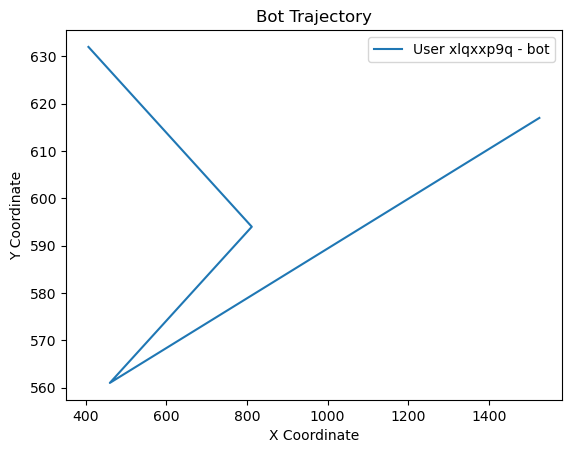

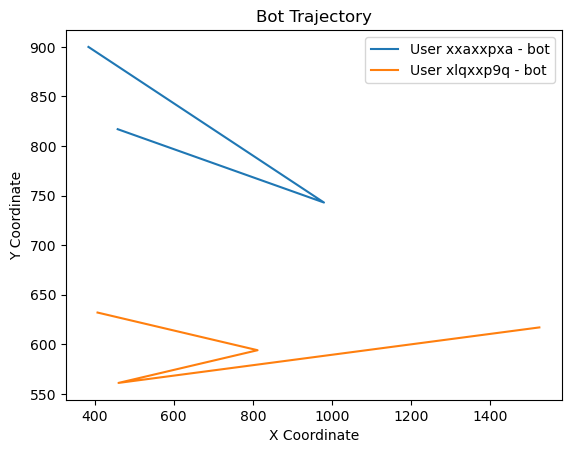

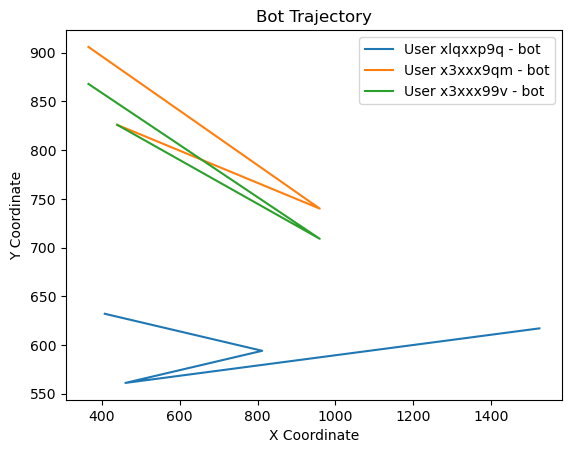

SystemExit: 0

D:\Users\ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QFileDialog, QLabel, QProgressBar, QTableWidget, QTableWidgetItem
from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(PlotCanvas, self).__init__(fig)

class CoordinateAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()

        self.df = None
        self.output_df = None
        self.selected_rows = []

        self.init_ui()

    def init_ui(self):
        # Create widgets
        self.load_button = QPushButton('Load Excel File', self)
        self.analyze_button = QPushButton('Analyze Coordinates', self)
        self.save_button = QPushButton('Save Bot DataFrame', self)
        self.plot_button = QPushButton('Plot Selected Rows', self)
        self.info_label = QLabel(self)
        self.progress_bar = QProgressBar(self)
        self.result_table = QTableWidget(self)
        self.plot_canvas = PlotCanvas(self)

        # Set up layout
        layout = QVBoxLayout()
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.save_button)
        layout.addWidget(self.info_label)
        layout.addWidget(self.progress_bar)
        layout.addWidget(self.result_table)
        layout.addWidget(self.plot_button)
        layout.addWidget(self.plot_canvas)
        self.setLayout(layout)

        # Connect buttons to functions
        self.load_button.clicked.connect(self.load_excel)
        self.analyze_button.clicked.connect(self.analyze_coordinates)
        self.save_button.clicked.connect(self.save_bot_dataframe)
        self.plot_button.clicked.connect(self.plot_selected_rows)

        # Set up the main window
        self.setGeometry(300, 300, 800, 600)
        self.setWindowTitle('Coordinate Analyzer')
        self.show()

    def remove_last_number_and_semicolon(self, line):
        num_digits = self.count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(self, line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    def process_coordinate_df(self, input_df, straight_line_threshold=100):
        bot_indexes = []
        human_indexes = []

        total_rows = len(input_df['Массив координат'])
        self.progress_bar.setMaximum(total_rows)
        self.progress_bar.setValue(0)

        for index, cell_value in enumerate(input_df['Массив координат']):
            if pd.isnull(cell_value) or cell_value == "":
                continue  # Skip iteration if the cell value is NaN or empty

            cell_value = self.remove_last_number_and_semicolon(cell_value)
            coord_list = cell_value.split(';')

            # Check if any empty string is present in coord_list
            if any(not coord for coord in coord_list):
                continue  # Skip iteration if an empty string is found

            x_coords = [int(coord.split(',')[0]) for coord in coord_list]
            y_coords = [int(coord.split(',')[1]) for coord in coord_list]

            straight_line_detected = False
            for i in range(2, len(coord_list)):
                x1, y1 = map(int, coord_list[i - 2].split(','))
                x2, y2 = map(int, coord_list[i].split(','))

                if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                    straight_line_detected = True
                    break

            if straight_line_detected:
                human_indexes.append(index)
            else:
                bot_indexes.append(index)

            self.progress_bar.setValue(index + 1)
            QApplication.processEvents()  # Ensure the GUI updates

        max_index = max(max(bot_indexes), max(human_indexes))
        concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

        input_df['Bot'] = concatenated_list
        self.output_df = input_df[input_df['Bot'] == 1]  # Retain 'Массив координат' in the output DataFrame
        return self.output_df

    def load_excel(self):
        options = QFileDialog.Options()
        file_name, _ = QFileDialog.getOpenFileName(self, "Open Excel File", "", "Excel Files (*.xlsx);;All Files (*)", options=options)

        if file_name:
            self.df = read_excel(file_name)
            self.info_label.setText(f'Loaded Excel file: {file_name}')
            self.result_table.setRowCount(0)  # Clear existing table when loading a new file

    def analyze_coordinates(self):
        if self.df is not None:
            self.load_button.setEnabled(False)
            self.analyze_button.setEnabled(False)
            self.save_button.setEnabled(False)
            self.plot_button.setEnabled(False)

            self.progress_bar.reset()
            self.result_table.clear()

            # Process coordinates
            self.df = self.process_coordinate_df(self.df)

            # Display resulting table with checkboxes
            self.result_table.setColumnCount(len(self.df.columns))
            self.result_table.setHorizontalHeaderLabels(self.df.columns)
            self.result_table.setRowCount(len(self.df))
            for i, row in enumerate(self.df.itertuples(index=False)):
                for j, value in enumerate(row):
                    item = QTableWidgetItem(str(value))
                    if j == 0:  # Assuming 'Массив координат' is the first column
                        item.setFlags(item.flags() | 0x00001000)  # Add ItemIsUserCheckable flag
                        item.setCheckState(0)  # Initially unchecked
                    self.result_table.setItem(i, j, item)

            self.info_label.setText('Coordinates Analyzed. Select rows to plot.')
            self.plot_button.setEnabled(True)
        else:
            self.info_label.setText('Please load an Excel file first.')

    def save_bot_dataframe(self):
        if self.output_df is not None:
            file_name, _ = QFileDialog.getSaveFileName(self, "Save Bot DataFrame", "", "Excel Files (*.xlsx);;All Files (*)")

            if file_name:
                self.output_df.to_excel(file_name, index=False)
                self.info_label.setText(f'Bot DataFrame saved to: {file_name}')
        else:
            self.info_label.setText('Please analyze coordinates first.')

    def plot_selected_rows(self):
        straight_line_threshold = 100
        self.selected_rows = [i for i in range(self.result_table.rowCount()) if self.result_table.item(i, 0).checkState() == 2]

        if not self.selected_rows:
            self.info_label.setText('No rows selected for plotting.')
        else:
            self.plot_button.setEnabled(False)

            # Plot selected rows
            for row_index in self.selected_rows:
                cell_value = self.df['Массив координат'].iloc[row_index]
                if pd.isnull(cell_value) or cell_value == "":
                    continue  # Skip iteration if the cell value is NaN or empty

                cell_value = self.remove_last_number_and_semicolon(cell_value)
                coord_list = cell_value.split(';')

                # Check if any empty string is present in coord_list
                if any(not coord for coord in coord_list):
                    continue  # Skip iteration if an empty string is found

                # Extract x and y coordinates from each pair
                x_coords = [int(coord.split(',')[0]) for coord in coord_list]
                y_coords = [int(coord.split(',')[1]) for coord in coord_list]

                # Calculate movement patterns
                straight_line_detected = False
                for i in range(2, len(coord_list)):
                    x1, y1 = map(int, coord_list[i - 2].split(','))
                    x2, y2 = map(int, coord_list[i].split(','))

                    # Check if the segment forms a straight line
                    if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                        straight_line_detected = True
                        break

                plt.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - bot")

            # Add legend and labels
            plt.legend()
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')
            plt.title(f'Bot Trajectory')
            plt.show()

            self.plot_button.setEnabled(True)



if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = CoordinateAnalyzerApp()
    sys.exit(app.exec_())


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QFileDialog, QLabel, QProgressBar, QTableWidget, QTableWidgetItem
from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(PlotCanvas, self).__init__(fig)

class CoordinateAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()

        self.df = None
        self.output_df = None
        self.selected_rows = []

        self.init_ui()

    def init_ui(self):
        # Create widgets
        self.load_button = QPushButton('Load Excel File', self)
        self.analyze_button = QPushButton('Analyze Coordinates', self)
        self.save_button = QPushButton('Save Bot DataFrame', self)
        self.plot_button = QPushButton('Plot Selected Rows', self)
        self.info_label = QLabel(self)
        self.progress_bar = QProgressBar(self)
        self.result_table = QTableWidget(self)
        self.plot_canvas = PlotCanvas(self)

        # Set up layout
        layout = QVBoxLayout()
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.save_button)
        layout.addWidget(self.info_label)
        layout.addWidget(self.progress_bar)
        layout.addWidget(self.result_table)
        layout.addWidget(self.plot_button)
        layout.addWidget(self.plot_canvas)
        self.setLayout(layout)

        # Connect buttons to functions
        self.load_button.clicked.connect(self.load_excel)
        self.analyze_button.clicked.connect(self.analyze_coordinates)
        self.save_button.clicked.connect(self.save_bot_dataframe)
        self.plot_button.clicked.connect(self.plot_selected_rows)

        # Set up the main window
        self.setGeometry(300, 300, 800, 600)
        self.setWindowTitle('Coordinate Analyzer')
        self.show()

    def remove_last_number_and_semicolon(self, line):
        num_digits = self.count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(self, line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    def process_coordinate_df(self, input_df, straight_line_threshold=100):
        bot_indexes = []
        human_indexes = []

        total_rows = len(input_df['Массив координат'])
        self.progress_bar.setMaximum(total_rows)
        self.progress_bar.setValue(0)

        for index, cell_value in enumerate(input_df['Массив координат']):
            if pd.isnull(cell_value) or cell_value == "":
                continue  # Skip iteration if the cell value is NaN or empty

            cell_value = self.remove_last_number_and_semicolon(cell_value)
            coord_list = cell_value.split(';')

            # Check if any empty string is present in coord_list
            if any(not coord for coord in coord_list):
                continue  # Skip iteration if an empty string is found

            x_coords = [int(coord.split(',')[0]) for coord in coord_list]
            y_coords = [int(coord.split(',')[1]) for coord in coord_list]

            straight_line_detected = False
            for i in range(2, len(coord_list)):
                x1, y1 = map(int, coord_list[i - 2].split(','))
                x2, y2 = map(int, coord_list[i].split(','))

                if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                    straight_line_detected = True
                    break

            if straight_line_detected:
                human_indexes.append(index)
            else:
                bot_indexes.append(index)

            self.progress_bar.setValue(index + 1)
            QApplication.processEvents()  # Ensure the GUI updates

        max_index = max(max(bot_indexes), max(human_indexes))
        concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

        input_df['Bot'] = concatenated_list
        self.output_df = input_df[input_df['Bot'] == 1]  # Retain 'Массив координат' in the output DataFrame
        return self.output_df

    def load_excel(self):
        options = QFileDialog.Options()
        file_name, _ = QFileDialog.getOpenFileName(self, "Open Excel File", "", "Excel Files (*.xlsx);;All Files (*)", options=options)

        if file_name:
            self.df = read_excel(file_name)
            self.info_label.setText(f'Loaded Excel file: {file_name}')
            self.result_table.setRowCount(0)  # Clear existing table when loading a new file

    def analyze_coordinates(self):
        if self.df is not None:
            self.load_button.setEnabled(False)
            self.analyze_button.setEnabled(False)
            self.save_button.setEnabled(False)
            self.plot_button.setEnabled(False)

            self.progress_bar.reset()
            self.result_table.clear()

            # Process coordinates
            self.df = self.process_coordinate_df(self.df)

            # Display resulting table with checkboxes
            self.result_table.setColumnCount(len(self.df.columns))
            self.result_table.setHorizontalHeaderLabels(self.df.columns)
            self.result_table.setRowCount(len(self.df))
            for i, row in enumerate(self.df.itertuples(index=False)):
                for j, value in enumerate(row):
                    item = QTableWidgetItem(str(value))
                    if j == 0:  # Assuming 'Массив координат' is the first column
                        item.setFlags(item.flags() | 0x00001000)  # Add ItemIsUserCheckable flag
                        item.setCheckState(0)  # Initially unchecked
                    self.result_table.setItem(i, j, item)

            self.info_label.setText('Coordinates Analyzed. Select rows to plot.')
            self.plot_button.setEnabled(True)
        else:
            self.info_label.setText('Please load an Excel file first.')

    def save_bot_dataframe(self):
        if self.output_df is not None:
            file_name, _ = QFileDialog.getSaveFileName(self, "Save Bot DataFrame", "", "Excel Files (*.xlsx);;All Files (*)")

            if file_name:
                self.output_df.to_excel(file_name, index=False)
                self.info_label.setText(f'Bot DataFrame saved to: {file_name}')
        else:
            self.info_label.setText('Please analyze coordinates first.')

    def plot_selected_rows(self):
        straight_line_threshold = 100
        self.selected_rows = [i for i in range(self.result_table.rowCount()) if self.result_table.item(i, 0).checkState() == 2]

        if not self.selected_rows:
            self.info_label.setText('No rows selected for plotting.')
        else:
            self.plot_button.setEnabled(False)

            # Plot selected rows
            for row_index in self.selected_rows:
                cell_value = self.df['Массив координат'].iloc[row_index]
                if pd.isnull(cell_value) or cell_value == "":
                    continue  # Skip iteration if the cell value is NaN or empty

                cell_value = self.remove_last_number_and_semicolon(cell_value)
                coord_list = cell_value.split(';')

                # Check if any empty string is present in coord_list
                if any(not coord for coord in coord_list):
                    continue  # Skip iteration if an empty string is found

                # Extract x and y coordinates from each pair
                x_coords = [int(coord.split(',')[0]) for coord in coord_list]
                y_coords = [int(coord.split(',')[1]) for coord in coord_list]

                # Calculate movement patterns
                straight_line_detected = False
                for i in range(2, len(coord_list)):
                    x1, y1 = map(int, coord_list[i - 2].split(','))
                    x2, y2 = map(int, coord_list[i].split(','))

                    # Check if the segment forms a straight line
                    if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                        straight_line_detected = True
                        break

                self.plot_canvas.axes.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - bot")

            # Add legend and labels
            self.plot_canvas.axes.legend()
            self.plot_canvas.axes.set_xlabel('X Coordinate')
            self.plot_canvas.axes.set_ylabel('Y Coordinate')
            self.plot_canvas.axes.set_title(f'Bot Trajectory')

            # Draw the canvas
            self.plot_canvas.draw()

            self.plot_button.setEnabled(True)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = CoordinateAnalyzerApp()
    sys.exit(app.exec_())


SystemExit: 0

D:\Users\ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QFileDialog, QLabel, QProgressBar, QTableWidget, QTableWidgetItem
from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
import os

class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(PlotCanvas, self).__init__(fig)

class CoordinateAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()

        self.df = None
        self.output_df = None
        self.selected_rows = []
        self.image_folder = 'images'

        self.init_ui()

    def init_ui(self):
        # Create widgets
        self.load_button = QPushButton('Load Excel File', self)
        self.analyze_button = QPushButton('Analyze Coordinates', self)
        self.save_button = QPushButton('Save Bot DataFrame', self)
        self.plot_button = QPushButton('Plot Selected Rows', self)
        self.info_label = QLabel(self)
        self.progress_bar = QProgressBar(self)
        self.result_table = QTableWidget(self)
        self.plot_canvas = PlotCanvas(self)

        # Set up layout
        layout = QVBoxLayout()
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.save_button)
        layout.addWidget(self.info_label)
        layout.addWidget(self.progress_bar)
        layout.addWidget(self.result_table)
        layout.addWidget(self.plot_button)
        layout.addWidget(self.plot_canvas)
        self.setLayout(layout)

        # Connect buttons to functions
        self.load_button.clicked.connect(self.load_excel)
        self.analyze_button.clicked.connect(self.analyze_coordinates)
        self.save_button.clicked.connect(self.save_bot_dataframe)
        self.plot_button.clicked.connect(self.plot_selected_rows)

        # Set up the main window
        self.setGeometry(300, 300, 800, 600)
        self.setWindowTitle('Coordinate Analyzer')
        self.show()

    def remove_last_number_and_semicolon(self, line):
        num_digits = self.count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(self, line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    def process_coordinate_df(self, input_df, straight_line_threshold=100):
        bot_indexes = []
        human_indexes = []

        total_rows = len(input_df['Массив координат'])
        self.progress_bar.setMaximum(total_rows)
        self.progress_bar.setValue(0)

        for index, cell_value in enumerate(input_df['Массив координат']):
            if pd.isnull(cell_value) or cell_value == "":
                continue  # Skip iteration if the cell value is NaN or empty

            cell_value = self.remove_last_number_and_semicolon(cell_value)
            coord_list = cell_value.split(';')

            # Check if any empty string is present in coord_list
            if any(not coord for coord in coord_list):
                continue  # Skip iteration if an empty string is found

            x_coords = [int(coord.split(',')[0]) for coord in coord_list]
            y_coords = [int(coord.split(',')[1]) for coord in coord_list]

            straight_line_detected = False
            for i in range(2, len(coord_list)):
                x1, y1 = map(int, coord_list[i - 2].split(','))
                x2, y2 = map(int, coord_list[i].split(','))

                if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                    straight_line_detected = True
                    break

            if straight_line_detected:
                human_indexes.append(index)
            else:
                bot_indexes.append(index)

            self.progress_bar.setValue(index + 1)
            QApplication.processEvents()  # Ensure the GUI updates

        max_index = max(max(bot_indexes), max(human_indexes))
        concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

        input_df['Bot'] = concatenated_list
        self.output_df = input_df[input_df['Bot'] == 1]   # Retain 'Массив координат' in the output DataFrame
        return self.output_df

    def load_excel(self):
        options = QFileDialog.Options()
        file_name, _ = QFileDialog.getOpenFileName(self, "Open Excel File", "", "Excel Files (*.xlsx);;All Files (*)", options=options)

        if file_name:
            self.df = read_excel(file_name)
            self.info_label.setText(f'Loaded Excel file: {file_name}')
            self.result_table.setRowCount(0)  # Clear existing table when loading a new file

    def analyze_coordinates(self):
        if self.df is not None:
            self.load_button.setEnabled(False)
            self.analyze_button.setEnabled(False)
            self.save_button.setEnabled(False)
            self.plot_button.setEnabled(False)

            self.progress_bar.reset()
            self.result_table.clear()

            # Process coordinates
            self.df = self.process_coordinate_df(self.df)

            # Display resulting table with checkboxes
            self.result_table.setColumnCount(len(self.df.columns))
            self.result_table.setHorizontalHeaderLabels(self.df.columns)
            self.result_table.setRowCount(len(self.df))
            for i, row in enumerate(self.df.itertuples(index=False)):
                for j, value in enumerate(row):
                    item = QTableWidgetItem(str(value))
                    if j == 0:  # Assuming 'Массив координат' is the first column
                        item.setFlags(item.flags() | 0x00001000)  # Add ItemIsUserCheckable flag
                        item.setCheckState(0)  # Initially unchecked
                    self.result_table.setItem(i, j, item)

            self.info_label.setText('Coordinates Analyzed. Select rows to plot.')
            self.plot_button.setEnabled(True)

            # Set output_df to the processed DataFrame
            self.output_df = self.df

            # Enable the Save button
            self.save_button.setEnabled(True)
        else:
            self.info_label.setText('Please load an Excel file first.')


    def save_bot_dataframe(self):
        straight_line_threshold = 100
        if self.output_df is not None:
            # Save DataFrame to Excel
            file_name, _ = QFileDialog.getSaveFileName(self, "Save Bot DataFrame", "", "Excel Files (*.xlsx);;All Files (*)")

            if file_name:
                self.output_df.to_excel(file_name, index=False)
                self.info_label.setText(f'Bot DataFrame saved to: {file_name}')

                # Save plots to 'images' folder
                if not os.path.exists(self.image_folder):
                    os.makedirs(self.image_folder)

                for row_index in range(len(self.df)):
                    cell_value = self.df['Массив координат'].iloc[row_index]
                    if pd.isnull(cell_value) or cell_value == "":
                        continue  # Skip iteration if the cell value is NaN or empty

                    cell_value = self.remove_last_number_and_semicolon(cell_value)
                    coord_list = cell_value.split(';')

                    # Check if any empty string is present in coord_list
                    if any(not coord for coord in coord_list):
                        continue  # Skip iteration if an empty string is found

                    # Extract x and y coordinates from each pair
                    x_coords = [int(coord.split(',')[0]) for coord in coord_list]
                    y_coords = [int(coord.split(',')[1]) for coord in coord_list]

                    # Calculate movement patterns
                    straight_line_detected = False
                    for i in range(2, len(coord_list)):
                        x1, y1 = map(int, coord_list[i - 2].split(','))
                        x2, y2 = map(int, coord_list[i].split(','))

                        # Check if the segment forms a straight line
                        if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                            straight_line_detected = True
                            break

                    # Plot and save as JPG
                    if straight_line_detected:
                        plt.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - Human")
                    else:
                        plt.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - Bot")

                    # Add legend and labels
                    plt.legend()
                    plt.xlabel('X Coordinate')
                    plt.ylabel('Y Coordinate')
                    plt.title(f'Trajectory {row_index+1}')
                    plt.savefig(os.path.join(self.image_folder, f'trajectory_{row_index+1}.jpg'))
                    plt.clf()  # Clear the figure for the next plot

                self.info_label.setText(f'Plots saved to: {os.path.abspath(self.image_folder)}')
        else:
            self.info_label.setText('Please analyze coordinates first.')

    def plot_selected_rows(self):
        straight_line_threshold = 100
        self.selected_rows = [i for i in range(self.result_table.rowCount()) if self.result_table.item(i, 0).checkState() == 2]

        if not self.selected_rows:
            self.info_label.setText('No rows selected for plotting.')
        else:
            self.plot_button.setEnabled(False)

            # Plot selected rows
            for row_index in self.selected_rows:
                cell_value = self.df['Массив координат'].iloc[row_index]
                if pd.isnull(cell_value) or cell_value == "":
                    continue  # Skip iteration if the cell value is NaN or empty

                cell_value = self.remove_last_number_and_semicolon(cell_value)
                coord_list = cell_value.split(';')

                # Check if any empty string is present in coord_list
                if any(not coord for coord in coord_list):
                    continue  # Skip iteration if an empty string is found

                # Extract x and y coordinates from each pair
                x_coords = [int(coord.split(',')[0]) for coord in coord_list]
                y_coords = [int(coord.split(',')[1]) for coord in coord_list]

                # Calculate movement patterns
                straight_line_detected = False
                for i in range(2, len(coord_list)):
                    x1, y1 = map(int, coord_list[i - 2].split(','))
                    x2, y2 = map(int, coord_list[i].split(','))

                    # Check if the segment forms a straight line
                    if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                        straight_line_detected = True
                        break

                self.plot_canvas.axes.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - bot")

            # Add legend and labels
            self.plot_canvas.axes.legend()
            self.plot_canvas.axes.set_xlabel('X Coordinate')
            self.plot_canvas.axes.set_ylabel('Y Coordinate')
            self.plot_canvas.axes.set_title(f'Bot Trajectory')

            # Draw the canvas
            self.plot_canvas.draw()

            self.plot_button.setEnabled(True)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = CoordinateAnalyzerApp()
    sys.exit(app.exec_())


SystemExit: 0

D:\Users\ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 640x480 with 0 Axes>

In [2]:
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QFileDialog, QLabel, QProgressBar, QTableWidget, QTableWidgetItem, QProgressDialog
from PyQt5.QtCore import Qt
from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
import os
import sys

class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(PlotCanvas, self).__init__(fig)

class CoordinateAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()

        self.df = None
        self.output_df = None
        self.selected_rows = []
        self.image_folder = 'images'
        self.image_saving_progress_dialog = None

        self.init_ui()

    def init_ui(self):
        # Create widgets
        self.load_button = QPushButton('Load Excel File', self)
        self.analyze_button = QPushButton('Analyze Coordinates', self)
        self.save_button = QPushButton('Save Bot DataFrame', self)
        self.plot_button = QPushButton('Plot Selected Rows', self)
        self.info_label = QLabel(self)
        self.progress_bar = QProgressBar(self)
        self.result_table = QTableWidget(self)
        self.plot_canvas = PlotCanvas(self)

        # Set up layout
        layout = QVBoxLayout()
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.save_button)
        layout.addWidget(self.info_label)
        layout.addWidget(self.progress_bar)
        layout.addWidget(self.result_table)
        layout.addWidget(self.plot_button)
        layout.addWidget(self.plot_canvas)
        self.setLayout(layout)

        # Connect buttons to functions
        self.load_button.clicked.connect(self.load_excel)
        self.analyze_button.clicked.connect(self.analyze_coordinates)
        self.save_button.clicked.connect(self.save_bot_dataframe)
        self.plot_button.clicked.connect(self.plot_selected_rows)

        # Set up the main window
        self.setGeometry(300, 300, 800, 600)
        self.setWindowTitle('Coordinate Analyzer')
        self.show()

    def remove_last_number_and_semicolon(self, line):
        num_digits = self.count_digits_before_last_semicolon(line)
        if line.endswith(","):
            line = line[:-1]  # Remove the last semicolon
        last_comma_index = line.rfind(",")  # Find the last comma index
        if last_comma_index != -1 and line[last_comma_index:].count(";") == 1:
            line = line[:last_comma_index + num_digits + 1]  # Remove the last number and last semicolon

        # Remove comma if it is the last symbol in the line
        if line.endswith(","):
            line = line[:-1]

        return line

    def count_digits_before_last_semicolon(self, line):
        last_semicolon_index = line.rfind(";")
        if last_semicolon_index == -1:
            return 0  # If there is no semicolon in the line, return 0

        before_semicolon = line[:last_semicolon_index]
        last_comma_index = before_semicolon.rfind(",")
        if last_comma_index == -1:
            return 0  # If there is no comma before the last semicolon, return 0

        number_before_semicolon = before_semicolon[last_comma_index + 1:]
        num_digits = sum(1 for char in number_before_semicolon if char.isdigit())
        return num_digits

    def process_coordinate_df(self, input_df, straight_line_threshold=100):
        bot_indexes = []
        human_indexes = []

        total_rows = len(input_df['Массив координат'])
        self.progress_bar.setMaximum(total_rows)
        self.progress_bar.setValue(0)

        for index, cell_value in enumerate(input_df['Массив координат']):
            if pd.isnull(cell_value) or cell_value == "":
                continue  # Skip iteration if the cell value is NaN or empty

            cell_value = self.remove_last_number_and_semicolon(cell_value)
            coord_list = cell_value.split(';')

            # Check if any empty string is present in coord_list
            if any(not coord for coord in coord_list):
                continue  # Skip iteration if an empty string is found

            x_coords = [int(coord.split(',')[0]) for coord in coord_list]
            y_coords = [int(coord.split(',')[1]) for coord in coord_list]

            straight_line_detected = False
            for i in range(2, len(coord_list)):
                x1, y1 = map(int, coord_list[i - 2].split(','))
                x2, y2 = map(int, coord_list[i].split(','))

                if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                    straight_line_detected = True
                    break

            if straight_line_detected:
                human_indexes.append(index)
            else:
                bot_indexes.append(index)

            self.progress_bar.setValue(index + 1)
            QApplication.processEvents()  # Ensure the GUI updates

        max_index = max(max(bot_indexes), max(human_indexes))
        concatenated_list = [1 if i in bot_indexes else 0 if i in human_indexes else np.nan for i in range(max_index + 1)]

        input_df['Bot'] = concatenated_list
        self.output_df = input_df[input_df['Bot'] == 1]   # Retain 'Массив координат' in the output DataFrame
        return self.output_df

    def load_excel(self):
        options = QFileDialog.Options()
        file_name, _ = QFileDialog.getOpenFileName(self, "Open Excel File", "", "Excel Files (*.xlsx);;All Files (*)", options=options)

        if file_name:
            self.df = read_excel(file_name)
            self.info_label.setText(f'Loaded Excel file: {file_name}')
            self.result_table.setRowCount(0)  # Clear existing table when loading a new file

    def analyze_coordinates(self):
        if self.df is not None:
            self.load_button.setEnabled(False)
            self.analyze_button.setEnabled(False)
            self.save_button.setEnabled(False)
            self.plot_button.setEnabled(False)

            self.progress_bar.reset()
            self.result_table.clear()

            # Process coordinates
            self.df = self.process_coordinate_df(self.df)

            # Display resulting table with checkboxes
            self.result_table.setColumnCount(len(self.df.columns))
            self.result_table.setHorizontalHeaderLabels(self.df.columns)
            self.result_table.setRowCount(len(self.df))
            for i, row in enumerate(self.df.itertuples(index=False)):
                for j, value in enumerate(row):
                    item = QTableWidgetItem(str(value))
                    if j == 0:  # Assuming 'Массив координат' is the first column
                        item.setFlags(item.flags() | 0x00001000)  # Add ItemIsUserCheckable flag
                        item.setCheckState(0)  # Initially unchecked
                    self.result_table.setItem(i, j, item)

            self.info_label.setText('Coordinates Analyzed. Select rows to plot.')
            self.plot_button.setEnabled(True)

            # Set output_df to the processed DataFrame
            self.output_df = self.df

            # Enable the Save button
            self.save_button.setEnabled(True)
        else:
            self.info_label.setText('Please load an Excel file first.')


    def save_bot_dataframe(self):
        straight_line_threshold = 100
        if self.output_df is not None:
            # Save DataFrame to Excel
            file_name, _ = QFileDialog.getSaveFileName(self, "Save Bot DataFrame", "", "Excel Files (*.xlsx);;All Files (*)")

            if file_name:
                self.output_df.to_excel(file_name, index=False)
                self.info_label.setText(f'Bot DataFrame saved to: {file_name}')

                # Save plots to 'images' folder
                if not os.path.exists(self.image_folder):
                    os.makedirs(self.image_folder)

                # Initialize progress bar for image saving
                total_rows = len(self.df)
                self.image_saving_progress_dialog = QProgressDialog("Saving Images...", "Cancel", 0, total_rows, self)
                self.image_saving_progress_dialog.setWindowTitle('Image Saving Progress')
                self.image_saving_progress_dialog.setWindowModality(Qt.WindowModal)

                for row_index in range(total_rows):
                    if self.image_saving_progress_dialog.wasCanceled():
                        break

                    cell_value = self.df['Массив координат'].iloc[row_index]
                    if pd.isnull(cell_value) or cell_value == "":
                        continue  # Skip iteration if the cell value is NaN or empty

                    cell_value = self.remove_last_number_and_semicolon(cell_value)
                    coord_list = cell_value.split(';')

                    # Check if any empty string is present in coord_list
                    if any(not coord for coord in coord_list):
                        continue  # Skip iteration if an empty string is found

                    # Extract x and y coordinates from each pair
                    x_coords = [int(coord.split(',')[0]) for coord in coord_list]
                    y_coords = [int(coord.split(',')[1]) for coord in coord_list]

                    # Calculate movement patterns
                    straight_line_detected = False
                    for i in range(2, len(coord_list)):
                        x1, y1 = map(int, coord_list[i - 2].split(','))
                        x2, y2 = map(int, coord_list[i].split(','))

                        # Check if the segment forms a straight line
                        if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                            straight_line_detected = True
                            break

                    # Plot and save as JPG
                    if straight_line_detected:
                        plt.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - Human")
                    else:
                        plt.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - Bot")

                    # Add legend and labels
                    plt.legend()
                    plt.xlabel('X Coordinate')
                    plt.ylabel('Y Coordinate')
                    plt.title(f'Trajectory {row_index + 1}')
                    plt.savefig(os.path.join(self.image_folder, f'trajectory_{row_index + 1}.jpg'))
                    plt.clf()  # Clear the figure for the next plot

                    # Update the progress bar
                    self.image_saving_progress_dialog.setValue(row_index + 1)

                # Close the progress bar
                self.image_saving_progress_dialog.setValue(total_rows)
                self.image_saving_progress_dialog.close()

                self.info_label.setText(f'Plots saved to: {os.path.abspath(self.image_folder)}')
        else:
            self.info_label.setText('Please analyze coordinates first.')

    def plot_selected_rows(self):
        straight_line_threshold = 100
        self.selected_rows = [i for i in range(self.result_table.rowCount()) if self.result_table.item(i, 0).checkState() == 2]

        if not self.selected_rows:
            self.info_label.setText('No rows selected for plotting.')
        else:
            self.plot_button.setEnabled(False)

            # Plot selected rows
            for row_index in self.selected_rows:
                cell_value = self.df['Массив координат'].iloc[row_index]
                if pd.isnull(cell_value) or cell_value == "":
                    continue  # Skip iteration if the cell value is NaN or empty

                cell_value = self.remove_last_number_and_semicolon(cell_value)
                coord_list = cell_value.split(';')

                # Check if any empty string is present in coord_list
                if any(not coord for coord in coord_list):
                    continue  # Skip iteration if an empty string is found

                # Extract x and y coordinates from each pair
                x_coords = [int(coord.split(',')[0]) for coord in coord_list]
                y_coords = [int(coord.split(',')[1]) for coord in coord_list]

                # Calculate movement patterns
                straight_line_detected = False
                for i in range(2, len(coord_list)):
                    x1, y1 = map(int, coord_list[i - 2].split(','))
                    x2, y2 = map(int, coord_list[i].split(','))

                    # Check if the segment forms a straight line
                    if abs((y2 - y1) * (x_coords[i - 1] - x1) - (x2 - x1) * (y_coords[i - 1] - y1)) < straight_line_threshold:
                        straight_line_detected = True
                        break

                self.plot_canvas.axes.plot(x_coords, y_coords, label=f"User {self.df['ACCOUNT_ID'].iloc[row_index]} - bot")

            # Add legend and labels
            self.plot_canvas.axes.legend()
            self.plot_canvas.axes.set_xlabel('X Coordinate')
            self.plot_canvas.axes.set_ylabel('Y Coordinate')
            self.plot_canvas.axes.set_title(f'Bot Trajectory')

            # Draw the canvas
            self.plot_canvas.draw()

            self.plot_button.setEnabled(True)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = CoordinateAnalyzerApp()
    sys.exit(app.exec_())


SystemExit: 0

D:\Users\ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 640x480 with 0 Axes>